# Lost Pets Dataset

I found a "Lost Pets" dataset (csv file) on [data.org](http://www.data.gov).

Lets take a look at it! First we will print all the headers from the file.


In [1]:
import csv
import matplotlib.pyplot as plt
from collections import defaultdict, Counter

with open('./Lost__found__adoptable_pets.csv', 'r') as csv_file:
    reader = csv.reader(csv_file, delimiter=",", quotechar='"')
    headers = next(reader)
    print(headers)

['impound_no', 'Animal_ID', 'Data_Source', 'Record_Type', 'Link', 'Current_Location', 'Animal_Name', 'animal_type', 'Age', 'Animal_Gender', 'Animal_Breed', 'Animal_Color', 'Date', 'Date_Type', 'Obfuscated_Address', 'City', 'State', 'Zip', 'jurisdiction', 'obfuscated_latitude', 'obfuscated_longitude', 'Image', 'image_alt_text', 'location_for_map', 'Memo']


So there's some interesting stuff we could extract from here. We will start by creating a dictionary csv reader that will allow us to access each individual column of the data set easily.

In [2]:
csv_file = open('./Lost__found__adoptable_pets.csv', 'r')
reader = csv.DictReader(csv_file)  

class CSVCounter(object):
    
    def __init__(self, file, reader):
        self.file = file
        self.reader = reader
        self.common_count = 0
        
    def count_field(self, field):
        self.file.seek(0)
        counts = defaultdict(int)
        next(self.reader)
        for row in self.reader:
            counts[row[field]] += 1
        if self.common_count:
            counts = dict(Counter(counts).most_common(self.common_count))
        key_list = list(counts.keys())
        key_count = list(counts.values())
        return (key_list, key_count)
    
    def plot(self, field, title):
        key_list, key_count = self.count_field(field)
        x = range(len(key_list))
        y = key_count
        plt.bar(x, y , color='blue', align='center')
        plt.title(title)
        plt.xticks(x, key_list, rotation=70)
        plt.show()
        
    def common_mode_on(self, count):
        self.common_count = count
        
    def common_mode_off(self):
        self.common_count = 0
        
    def __del__(self):
        self.file.close()
        
LostPetDataCnt = CSVCounter(csv_file, reader)

# Data Exploration

Lets start by graphing (counting) some columns.

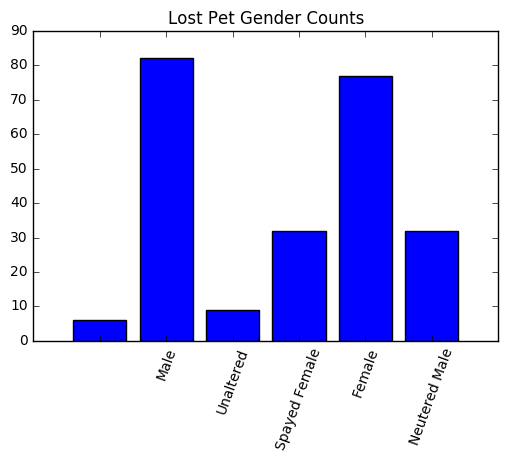

In [3]:
LostPetDataCnt.plot('Animal_Gender', 'Lost Pet Gender Counts')

It appears that neutered pets are less likely to get lost than unneutered pets.

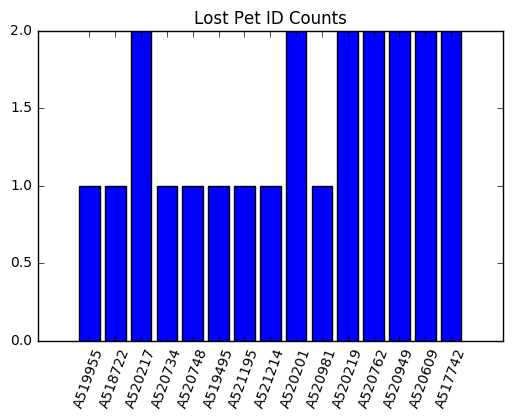

In [4]:
LostPetDataCnt.common_mode_on(15)
LostPetDataCnt.plot('Animal_ID', 'Lost Pet ID Counts')
LostPetDataCnt.common_mode_off()

It appears that no unique pet was lost more than twice! That's not too bad...

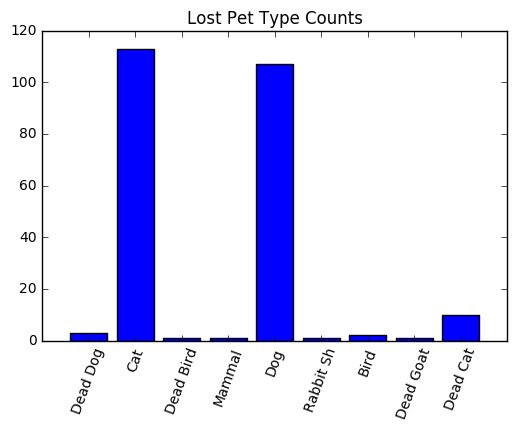

In [5]:
LostPetDataCnt.plot('animal_type', 'Lost Pet Type Counts')

People lose their cats more than their dogs which makes sense. I don't know why they are tracking dead animals as lost...

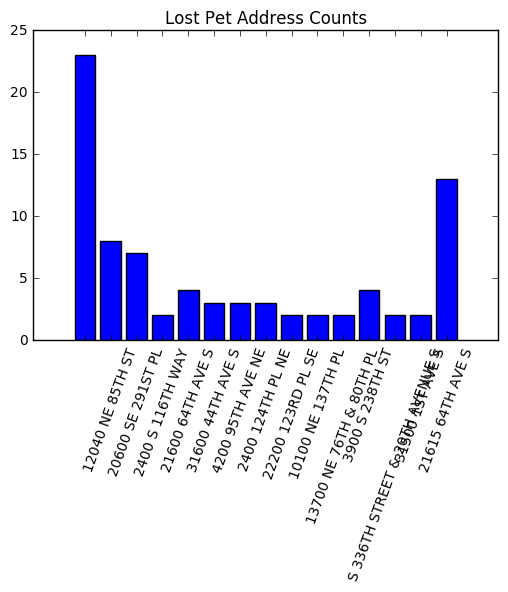

In [6]:
LostPetDataCnt.common_mode_on(15)
LostPetDataCnt.plot('Obfuscated_Address', 'Lost Pet Address Counts')
LostPetDataCnt.common_mode_off()

Most animals that got lost did not have an address. There were a handful of addresses that had 5+ pet losses. Perhaps they are irresponsible owners.

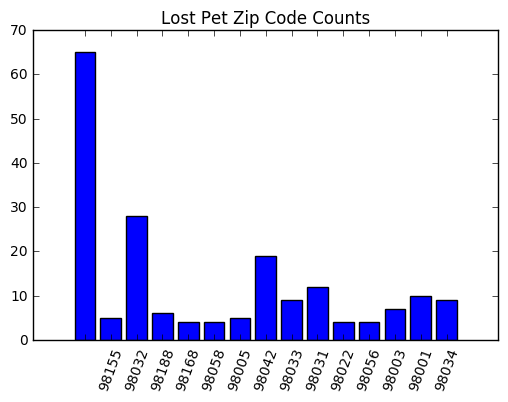

In [7]:
LostPetDataCnt.common_mode_on(15)
LostPetDataCnt.plot('Zip', 'Lost Pet Zip Code Counts')
LostPetDataCnt.common_mode_off()

Again, the majority of lost pets did not have a zip code entered for them. 98032 and 98042 seem to have a lot of lost pets though. That would be Kent, WA and Covington, WA, respectively.

Turns out these areas are right next to each other.